In [24]:
import os
import sys

base_module_pth = "/data/user_data/sbharad2/SpeechCLIP"
sys.path.append(os.path.abspath(base_module_pth))

import argparse
import warnings
import importlib

from avssl import task

/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
for snr in range(5, 41, 5):
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--task", default="TrainKWClip_GeneralTransformer", type=str, required=False
    )

    args, unknown = parser.parse_known_args()
    runner = getattr(task, args.task)()
    parser = runner.add_args(parser)

    print(f"Running for SNR: {snr}")
    oldsysargv = sys.argv
    cmdstring = f"TrainKWClip_GeneralTransformer --snr={snr} --name=flickr_analysis --text_file=Flickr8k.flickr_dev_sampled.token.txt --dataset_root=data/flickr --resume=/data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt --gpus=1 --njobs=4 --seed=7122 --test --save_path=exp_test"
    sys.argv = cmdstring.split()
    args = runner.parse_args(parser)
    # sys.argv = oldsysargv
    runner.run()

Global seed set to 7122


Running for SNR: 5


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

Using cache found in /home/sbharad2/.cache/torch/hub/s3prl_cache/5e6b91abd59b390dc3f89225f0e7d26f5bcb6fac496a08110c8862e3b1bb93e7
for https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt


2024-11-10 10:40:33 | INFO | fairseq.tasks.hubert_pretraining | current directory is /data/user_data/sbharad2/SpeechCLIP
2024-11-10 10:40:33 | INFO | fairseq.tasks.hubert_pretraining | HubertPretrainingTask Config {'_name': 'hubert_pretraining', 'data': '/checkpoint/wnhsu/data/librispeech/960h/iter/250K_50hz_km100_mp0_65_v2', 'fine_tuning': False, 'labels': ['layer6.km500'], 'label_dir': None, 'label_rate': 50.0, 'sample_rate': 16000, 'normalize': False, 'enable_padding': False, 'max_keep_size': None, 'max_sample_size': 250000, 'min_sample_size': 32000, 'single_target': False, 'random_crop': True, 'pad_audio': False}
2024-11-10 10:40:33 | INFO | fairseq.models.hubert.hubert | HubertModel Config: {'_name': 'hubert', 'label_rate': 50.0, 'extractor_mode': default, 'encoder_layers': 12, 'encoder_embed_dim': 768, 'encoder_ffn_embed_dim': 3072, 'encoder_attention_heads': 12, 'activation_fn': gelu, 'layer_type': transformer, 'dropout': 0.1, 'attention_dropout': 0.1, 'activation_dropout': 0.0,

Preparing data for images from data/flickr/Flickr_8k.flickr_dev_sampledImages.txt
Loaded captions for 200 images from data/flickr/Flickr8k.flickr_dev_sampled.token.txt
Loaded 1000 caption file names
First 5: ['1802092493_7b44fdb6b9_0.wav', '166433861_70b66cd381_0.wav', '1138784872_69ade3f2ab_4.wav', '2198511848_311d8a8c2f_4.wav', '1215334959_b1970965f7_0.wav']


Restoring states from the checkpoint path at /data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt
/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setti

Validating:   2%|▏         | 3/125 [00:03<01:38,  1.24it/s]

/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:59: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


Validating: 100%|██████████| 125/125 [00:11<00:00, 13.61it/s]Total #200 images, #1000 audio
val_recall_AI {'recall@1': 30.500000715255737, 'recall@5': 59.79999899864197, 'recall@10': 68.90000104904175}
val_recall_IA {'recall@1': 51.99999809265137, 'recall@5': 83.49999785423279, 'recall@10': 91.00000262260437}
val_recall_mean {'recall@1': 41.24999940395355, 'recall@5': 71.64999842643738, 'recall@10': 79.95000183582306}
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_cl_temp': 14.285733222961426,
 'val_cl_temp_epoch': 14.285733222961426,
 'val_loss': 0.5102545619010925,
 'val_loss_epoch': 0.5102545619010925,
 'val_p_cl_loss': 0.5102545619010925,
 'val_p_cl_loss_epoch': 0.5102545619010925}
--------------------------------------------------------------------------------
Validating: 100%|██████████| 125/125 [00:11<00:00, 10.83it/s]


Global seed set to 7122


Running for SNR: 10


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

Using cache found in /home/sbharad2/.cache/torch/hub/s3prl_cache/5e6b91abd59b390dc3f89225f0e7d26f5bcb6fac496a08110c8862e3b1bb93e7
for https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/fairseq/checkpoint_utils.py:315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state 

Preparing data for images from data/flickr/Flickr_8k.flickr_dev_sampledImages.txt
Loaded captions for 200 images from data/flickr/Flickr8k.flickr_dev_sampled.token.txt
Loaded 1000 caption file names
First 5: ['1802092493_7b44fdb6b9_0.wav', '166433861_70b66cd381_0.wav', '1138784872_69ade3f2ab_4.wav', '2198511848_311d8a8c2f_4.wav', '1215334959_b1970965f7_0.wav']


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt


Validating: 100%|██████████| 125/125 [01:47<00:00,  1.19it/s]Total #200 images, #1000 audio
val_recall_AI {'recall@1': 38.89999985694885, 'recall@5': 71.60000205039978, 'recall@10': 79.6999990940094}
val_recall_IA {'recall@1': 60.50000190734863, 'recall@5': 86.50000095367432, 'recall@10': 91.00000262260437}
val_recall_mean {'recall@1': 49.70000088214874, 'recall@5': 79.05000150203705, 'recall@10': 85.35000085830688}
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_cl_temp': 14.285733222961426,
 'val_cl_temp_epoch': 14.285733222961426,
 'val_loss': 0.3700273931026459,
 'val_loss_epoch': 0.3700273931026459,
 'val_p_cl_loss': 0.3700273931026459,
 'val_p_cl_loss_epoch': 0.3700273931026459}
--------------------------------------------------------------------------------
Validating: 100%|██████████| 125/125 [01:47<00:00,  1.16it/s]


Global seed set to 7122


Running for SNR: 15


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

Using cache found in /home/sbharad2/.cache/torch/hub/s3prl_cache/5e6b91abd59b390dc3f89225f0e7d26f5bcb6fac496a08110c8862e3b1bb93e7
for https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/fairseq/checkpoint_utils.py:315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state 

Preparing data for images from data/flickr/Flickr_8k.flickr_dev_sampledImages.txt
Loaded captions for 200 images from data/flickr/Flickr8k.flickr_dev_sampled.token.txt
Loaded 1000 caption file names
First 5: ['1802092493_7b44fdb6b9_0.wav', '166433861_70b66cd381_0.wav', '1138784872_69ade3f2ab_4.wav', '2198511848_311d8a8c2f_4.wav', '1215334959_b1970965f7_0.wav']


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt


Validating:  98%|█████████▊| 123/125 [00:48<00:00, 20.47it/s]Total #200 images, #1000 audio
val_recall_AI {'recall@1': 44.10000145435333, 'recall@5': 75.3000020980835, 'recall@10': 84.7000002861023}
val_recall_IA {'recall@1': 64.49999809265137, 'recall@5': 89.99999761581421, 'recall@10': 94.9999988079071}
val_recall_mean {'recall@1': 54.29999977350235, 'recall@5': 82.64999985694885, 'recall@10': 89.8499995470047}
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_cl_temp': 14.285733222961426,
 'val_cl_temp_epoch': 14.285733222961426,
 'val_loss': 0.3119346499443054,
 'val_loss_epoch': 0.3119346499443054,
 'val_p_cl_loss': 0.3119346499443054,
 'val_p_cl_loss_epoch': 0.3119346499443054}
--------------------------------------------------------------------------------
Validating: 100%|██████████| 125/125 [00:48<00:00,  2.56it/s]


Global seed set to 7122


Running for SNR: 20


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

Using cache found in /home/sbharad2/.cache/torch/hub/s3prl_cache/5e6b91abd59b390dc3f89225f0e7d26f5bcb6fac496a08110c8862e3b1bb93e7
for https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/fairseq/checkpoint_utils.py:315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state 

Preparing data for images from data/flickr/Flickr_8k.flickr_dev_sampledImages.txt
Loaded captions for 200 images from data/flickr/Flickr8k.flickr_dev_sampled.token.txt
Loaded 1000 caption file names
First 5: ['1802092493_7b44fdb6b9_0.wav', '166433861_70b66cd381_0.wav', '1138784872_69ade3f2ab_4.wav', '2198511848_311d8a8c2f_4.wav', '1215334959_b1970965f7_0.wav']


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Restoring states from the checkpoint path at /data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt


Validating: 100%|██████████| 125/125 [00:09<00:00, 13.60it/s]Total #200 images, #1000 audio
val_recall_AI {'recall@1': 45.60000002384186, 'recall@5': 77.89999842643738, 'recall@10': 86.79999709129333}
val_recall_IA {'recall@1': 66.00000262260437, 'recall@5': 92.00000166893005, 'recall@10': 95.99999785423279}
val_recall_mean {'recall@1': 55.800001323223114, 'recall@5': 84.95000004768372, 'recall@10': 91.39999747276306}
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_cl_temp': 14.285733222961426,
 'val_cl_temp_epoch': 14.285733222961426,
 'val_loss': 0.28935614228248596,
 'val_loss_epoch': 0.28935614228248596,
 'val_p_cl_loss': 0.28935614228248596,
 'val_p_cl_loss_epoch': 0.28935614228248596}
--------------------------------------------------------------------------------
Validating: 100%|██████████| 125/125 [00:09<00:00, 12.71it/s]


Global seed set to 7122


Running for SNR: 25


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

Using cache found in /home/sbharad2/.cache/torch/hub/s3prl_cache/5e6b91abd59b390dc3f89225f0e7d26f5bcb6fac496a08110c8862e3b1bb93e7
for https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/fairseq/checkpoint_utils.py:315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state 

Preparing data for images from data/flickr/Flickr_8k.flickr_dev_sampledImages.txt
Loaded captions for 200 images from data/flickr/Flickr8k.flickr_dev_sampled.token.txt
Loaded 1000 caption file names
First 5: ['1802092493_7b44fdb6b9_0.wav', '166433861_70b66cd381_0.wav', '1138784872_69ade3f2ab_4.wav', '2198511848_311d8a8c2f_4.wav', '1215334959_b1970965f7_0.wav']


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt


Validating:  99%|█████████▉| 124/125 [00:09<00:00, 15.78it/s]Total #200 images, #1000 audio
val_recall_AI {'recall@1': 48.19999933242798, 'recall@5': 79.29999828338623, 'recall@10': 87.69999742507935}
val_recall_IA {'recall@1': 65.49999713897705, 'recall@5': 90.49999713897705, 'recall@10': 94.9999988079071}
val_recall_mean {'recall@1': 56.849998235702515, 'recall@5': 84.89999771118164, 'recall@10': 91.34999811649323}
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_cl_temp': 14.285733222961426,
 'val_cl_temp_epoch': 14.285733222961426,
 'val_loss': 0.27951911091804504,
 'val_loss_epoch': 0.27951911091804504,
 'val_p_cl_loss': 0.27951911091804504,
 'val_p_cl_loss_epoch': 0.27951911091804504}
--------------------------------------------------------------------------------
Validating: 100%|██████████| 125/125 [00:10<00:00, 12.47it/s]


Global seed set to 7122


Running for SNR: 30


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

Using cache found in /home/sbharad2/.cache/torch/hub/s3prl_cache/5e6b91abd59b390dc3f89225f0e7d26f5bcb6fac496a08110c8862e3b1bb93e7
for https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/fairseq/checkpoint_utils.py:315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state 

Preparing data for images from data/flickr/Flickr_8k.flickr_dev_sampledImages.txt
Loaded captions for 200 images from data/flickr/Flickr8k.flickr_dev_sampled.token.txt
Loaded 1000 caption file names
First 5: ['1802092493_7b44fdb6b9_0.wav', '166433861_70b66cd381_0.wav', '1138784872_69ade3f2ab_4.wav', '2198511848_311d8a8c2f_4.wav', '1215334959_b1970965f7_0.wav']


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt


Validating: 100%|██████████| 125/125 [00:09<00:00, 12.93it/s]Total #200 images, #1000 audio
val_recall_AI {'recall@1': 48.69999885559082, 'recall@5': 80.0000011920929, 'recall@10': 88.7000024318695}
val_recall_IA {'recall@1': 67.00000166893005, 'recall@5': 91.00000262260437, 'recall@10': 95.99999785423279}
val_recall_mean {'recall@1': 57.85000026226044, 'recall@5': 85.50000190734863, 'recall@10': 92.35000014305115}
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_cl_temp': 14.285733222961426,
 'val_cl_temp_epoch': 14.285733222961426,
 'val_loss': 0.2735549509525299,
 'val_loss_epoch': 0.2735549509525299,
 'val_p_cl_loss': 0.2735549509525299,
 'val_p_cl_loss_epoch': 0.2735549509525299}
--------------------------------------------------------------------------------
Validating: 100%|██████████| 125/125 [00:09<00:00, 12.86it/s]


Global seed set to 7122


Running for SNR: 35


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

Using cache found in /home/sbharad2/.cache/torch/hub/s3prl_cache/5e6b91abd59b390dc3f89225f0e7d26f5bcb6fac496a08110c8862e3b1bb93e7
for https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/fairseq/checkpoint_utils.py:315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state 

Preparing data for images from data/flickr/Flickr_8k.flickr_dev_sampledImages.txt
Loaded captions for 200 images from data/flickr/Flickr8k.flickr_dev_sampled.token.txt
Loaded 1000 caption file names
First 5: ['1802092493_7b44fdb6b9_0.wav', '166433861_70b66cd381_0.wav', '1138784872_69ade3f2ab_4.wav', '2198511848_311d8a8c2f_4.wav', '1215334959_b1970965f7_0.wav']


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Restoring states from the checkpoint path at /data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /data/user_data/sbharad2/SpeechCLIP/slt_ckpts/SpeechCLIP/base/flickr/parallel/epoch_131-step_15443-val_recall_mean_1_36.0100.ckpt


Validating:  99%|█████████▉| 124/125 [00:09<00:00, 17.85it/s]Total #200 images, #1000 audio
val_recall_AI {'recall@1': 49.59999918937683, 'recall@5': 81.00000023841858, 'recall@10': 88.89999985694885}
val_recall_IA {'recall@1': 67.00000166893005, 'recall@5': 89.49999809265137, 'recall@10': 95.49999833106995}
val_recall_mean {'recall@1': 58.30000042915344, 'recall@5': 85.24999916553497, 'recall@10': 92.1999990940094}
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_cl_temp': 14.285733222961426,
 'val_cl_temp_epoch': 14.285733222961426,
 'val_loss': 0.2716776728630066,
 'val_loss_epoch': 0.2716776728630066,
 'val_p_cl_loss': 0.2716776728630066,
 'val_p_cl_loss_epoch': 0.2716776728630066}
--------------------------------------------------------------------------------
Validating: 100%|██████████| 125/125 [00:09<00:00, 13.22it/s]


Global seed set to 7122


Running for SNR: 40


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

Using cache found in /home/sbharad2/.cache/torch/hub/s3prl_cache/5e6b91abd59b390dc3f89225f0e7d26f5bcb6fac496a08110c8862e3b1bb93e7
for https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/fairseq/checkpoint_utils.py:315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state 

Preparing data for images from data/flickr/Flickr_8k.flickr_dev_sampledImages.txt
Loaded captions for 200 images from data/flickr/Flickr8k.flickr_dev_sampled.token.txt
Loaded 1000 caption file names
First 5: ['1802092493_7b44fdb6b9_0.wav', '166433861_70b66cd381_0.wav', '1138784872_69ade3f2ab_4.wav', '2198511848_311d8a8c2f_4.wav', '1215334959_b1970965f7_0.wav']


2024-11-10 10:45:15 | INFO | avssl.data.flickr_dataset | Flickr8k (flickr_dev_sampled): 1000 samples and skipped 0
Using 16bit native Automatic Mixed Precision (AMP)
/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/plugins/precision/native_amp.py:53: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:45: LightningDeprecationWarning: Setting `Trainer(resume_from_checkpoint=)` is deprecated in v1.5 and will be removed in v1.7. Please pass `Trainer.fit(ckpt_path=)` directly instead.
  rank_zero_deprecation(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Restoring states from the checkpoint path at /data/user_data

Validating: 100%|██████████| 125/125 [00:09<00:00, 14.37it/s]Total #200 images, #1000 audio
val_recall_AI {'recall@1': 49.799999594688416, 'recall@5': 81.49999976158142, 'recall@10': 88.30000162124634}
val_recall_IA {'recall@1': 66.50000214576721, 'recall@5': 91.00000262260437, 'recall@10': 95.49999833106995}
val_recall_mean {'recall@1': 58.150000870227814, 'recall@5': 86.2500011920929, 'recall@10': 91.89999997615814}
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_cl_temp': 14.285733222961426,
 'val_cl_temp_epoch': 14.285733222961426,
 'val_loss': 0.2690138816833496,
 'val_loss_epoch': 0.2690138816833496,
 'val_p_cl_loss': 0.2690138816833496,
 'val_p_cl_loss_epoch': 0.2690138816833496}
--------------------------------------------------------------------------------
Validating: 100%|██████████| 125/125 [00:10<00:00, 12.50it/s]


In [4]:
runner.run()

Global seed set to 7122
/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to 

Using cache found in /home/sbharad2/.cache/torch/hub/s3prl_cache/5e6b91abd59b390dc3f89225f0e7d26f5bcb6fac496a08110c8862e3b1bb93e7
for https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt


2024-11-09 18:53:27 | INFO | fairseq.tasks.hubert_pretraining | current directory is /data/user_data/sbharad2/SpeechCLIP
2024-11-09 18:53:27 | INFO | fairseq.tasks.hubert_pretraining | HubertPretrainingTask Config {'_name': 'hubert_pretraining', 'data': '/checkpoint/wnhsu/data/librispeech/960h/iter/250K_50hz_km100_mp0_65_v2', 'fine_tuning': False, 'labels': ['layer6.km500'], 'label_dir': None, 'label_rate': 50.0, 'sample_rate': 16000, 'normalize': False, 'enable_padding': False, 'max_keep_size': None, 'max_sample_size': 250000, 'min_sample_size': 32000, 'single_target': False, 'random_crop': True, 'pad_audio': False}
2024-11-09 18:53:27 | INFO | fairseq.models.hubert.hubert | HubertModel Config: {'_name': 'hubert', 'label_rate': 50.0, 'extractor_mode': default, 'encoder_layers': 12, 'encoder_embed_dim': 768, 'encoder_ffn_embed_dim': 3072, 'encoder_attention_heads': 12, 'activation_fn': gelu, 'layer_type': transformer, 'dropout': 0.1, 'attention_dropout': 0.1, 'activation_dropout': 0.0,

Preparing data for images from data/flickr/Flickr_8k.flickr_dev_sampledImages.txt
Loaded captions for 200 images from data/flickr/Flickr8k.flickr_dev_sampled.token.txt
Loaded 1000 caption file names
First 5: ['1510078253_96e9ec50e7_4.wav', '2057160636_6e9cf3b5f0_1.wav', '143552829_72b6ba49d4_2.wav', '136644885_f7d2bbf546_0.wav', '2178095150_436b035741_3.wav']


/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/cloud_io.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

Validating:   3%|▎         | 4/125 [00:02<01:08,  1.75it/s]

/data/user_data/sbharad2/espnet/tools/miniconda/envs/spclip/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:59: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


Validating:  99%|█████████▉| 124/125 [00:08<00:00, 23.61it/s]Total #200 images, #1000 audio
val_recall_AI {'recall@1': 49.799999594688416, 'recall@5': 81.49999976158142, 'recall@10': 88.30000162124634}
val_recall_IA {'recall@1': 66.50000214576721, 'recall@5': 91.00000262260437, 'recall@10': 95.49999833106995}
val_recall_mean {'recall@1': 58.150000870227814, 'recall@5': 86.2500011920929, 'recall@10': 91.89999997615814}
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_cl_temp': 14.285733222961426,
 'val_cl_temp_epoch': 14.285733222961426,
 'val_loss': 0.2690138816833496,
 'val_loss_epoch': 0.2690138816833496,
 'val_p_cl_loss': 0.2690138816833496,
 'val_p_cl_loss_epoch': 0.2690138816833496}
--------------------------------------------------------------------------------
Validating: 100%|██████████| 125/125 [00:08<00:00, 14.66it/s]


In [ ]:
import pandas as pd

csv_path = "/data/user_data/sbharad2/SpeechCLIP/data/flickr/flickr_dev_sampled.csv"
df = pd.read_csv(csv_path)
df

,example_id,caption,wav,split,image_id,target
0,1022454332_6af2c1449a.jpg#0,A child and a woman are at waters edge in a bi...,1022454332_6af2c1449a_0.wav,dev,1022454332_6af2c1449a.jpg,"['city', 'woman', 'child']"
1,1022454332_6af2c1449a.jpg#1,a large lake with a lone duck swimming in it w...,1022454332_6af2c1449a_1.wav,dev,1022454332_6af2c1449a.jpg,"['lone', 'lake', 'edge']"
2,1022454332_6af2c1449a.jpg#2,A little boy at a lake watching a duck .,1022454332_6af2c1449a_2.wav,dev,1022454332_6af2c1449a.jpg,"['boy', 'lake']"
3,1022454332_6af2c1449a.jpg#3,A young boy waves his hand at the duck in the ...,1022454332_6af2c1449a_3.wav,dev,1022454332_6af2c1449a.jpg,"['water', 'boy', 'hand', 'park']"
4,1022454332_6af2c1449a.jpg#4,"Two people are at the edge of a lake , facing ...",1022454332_6af2c1449a_4.wav,dev,1022454332_6af2c1449a.jpg,"['water', 'lake', 'city', 'edge']"
...,...,...,...,...,...,...
995,2394857899_76bfdf720b.jpg#0,A man in an orange construction uniform wears ...,2394857899_76bfdf720b_0.wav,dev,2394857899_76bfdf720b.jpg,"['hose', 'water', 'orange', 'construction', 'u..."
996,2394857899_76bfdf720b.jpg#1,A man in an orange safety suit spraying water .,2394857899_76bfdf720b_1.wav,dev,2394857899_76bfdf720b.jpg,"['water', 'orange', 'safety', 'suit', 'man']"
997,2394857899_76bfdf720b.jpg#2,A man in a public road workers uniform sprays ...,2394857899_76bfdf720b_2.wav,dev,2394857899_76bfdf720b.jpg,"['road', 'water', 'man']"
998,2394857899_76bfdf720b.jpg#3,A man wearing an orange uniform is working out...,2394857899_76bfdf720b_3.wav,dev,2394857899_76bfdf720b.jpg,"['hose', 'uniform', 'man', 'orange']"


Image: 1178705300_c224d9a4f1.jpg
Caption: a brown dog jumping into a pool after a bloe ball .


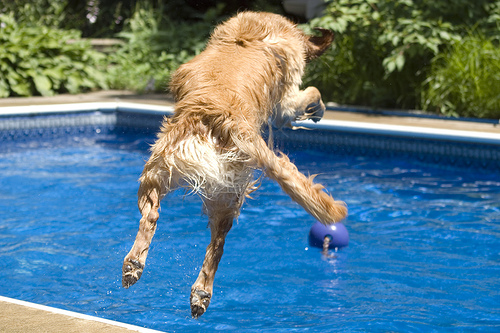

In [21]:
# load and display an image along with its caption from the dataset
r = df.iloc[95]

image_base_path = "/data/user_data/sbharad2/SpeechCLIP/data/flickr/Images"

image_name = r["image_id"]
caption = r["caption"]
print(f"Image: {image_name}")
print(f"Caption: {caption}")

# display the image
from PIL import Image
import os

image_path = os.path.join(image_base_path, image_name)
img = Image.open(image_path)
img

In [ ]:
import nltk

nltk.pos_tag(caption.split())
nltk.pos_tag("A brown dog jumping into a pool after a blue ball.".split())

[('A', 'DT'),
 ('brown', 'JJ'),
 ('dog', 'NN'),
 ('jumping', 'VBG'),
 ('into', 'IN'),
 ('a', 'DT'),
 ('pool', 'NN'),
 ('after', 'IN'),
 ('a', 'DT'),
 ('blue', 'JJ'),
 ('ball.', 'NN')]